## Imports

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Load Dataset

In [2]:
restaurants = pd.read_csv('restaurants.csv')
restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [3]:
menus = pd.read_csv('restaurant-menus.csv')
menus.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


## Dataset Information

In [4]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63469 entries, 0 to 63468
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63469 non-null  int64  
 1   position      63469 non-null  int64  
 2   name          63469 non-null  object 
 3   score         35302 non-null  float64
 4   ratings       35302 non-null  float64
 5   category      63384 non-null  object 
 6   price_range   52852 non-null  object 
 7   full_address  63016 non-null  object 
 8   zip_code      62952 non-null  object 
 9   lat           63469 non-null  float64
 10  lng           63469 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 5.3+ MB


In [5]:
menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117217 entries, 0 to 5117216
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 195.2+ MB


In [6]:
restaurants.isnull().sum()

id                  0
position            0
name                0
score           28167
ratings         28167
category           85
price_range     10617
full_address      453
zip_code          517
lat                 0
lng                 0
dtype: int64

In [7]:
menus.isnull().sum()

restaurant_id          0
category               0
name                   4
description      1452145
price                  0
dtype: int64

In [8]:
restaurants.describe()

,id,position,score,ratings,lat,lng
count,63469.000000,63469.000000,35302.000000,35302.000000,63469.000000,63469.000000
mean,31735.000000,86.692102,4.551431,74.887060,36.585019,-96.715114
std,18322.066455,79.280129,0.300675,69.874057,6.458959,14.438166
min,1.000000,1.000000,1.300000,10.000000,0.000000,-123.841240
25%,15868.000000,18.000000,4.400000,25.000000,30.442221,-98.569760
50%,31735.000000,61.000000,4.600000,52.000000,34.707265,-96.764330
75%,47602.000000,141.000000,4.800000,100.000000,40.884903,-87.938729
max,63469.000000,300.000000,5.000000,500.000000,48.963950,0.000000


In [9]:
menus.describe()

,restaurant_id
count,5.117217e+06
mean,3.090644e+04
std,1.824669e+04
min,1.000000e+00
25%,1.589300e+04
50%,2.927300e+04
75%,4.664700e+04
max,6.346900e+04


In [10]:
restaurants.shape

(63469, 11)

In [11]:
menus.shape

(5117217, 5)

## Reshaping the Dataset

In [12]:
restaurants.drop(columns=['full_address', 'zip_code'], inplace=True)

## Analysing Values

In [13]:
restaurants['price_range'].value_counts()

price_range
$                    37637
$$                   14952
$$$                    237
$$$$                    25
$$$$$$$$$$$$$$$$$        1
Name: count, dtype: int64

In [14]:
menus[menus['description'].isnull()]['name'].value_counts()

name
Bottled Water                        6598
French Fries                         5493
Sprite                               3997
Diet Coke                            3694
Iced Tea                             3299
                                     ... 
Aquafina Water\r\n                      1
Dasani Water\r\n                        1
Smart Water\r\n                         1
Coca Cola en Latta                      1
Celsius Sparkling Watermelon 12oz       1
Name: count, Length: 380275, dtype: int64

In [15]:
menus[menus['name'].isnull()]['category'].value_counts()

category
Tacos      2
Sauces*    1
Bites      1
Name: count, dtype: int64

## Cleaning the Dataset

In [16]:
restaurants['price_range'].replace("$", 1, inplace=True)
restaurants['price_range'].replace("$$", 2, inplace=True)
restaurants['price_range'].replace("$$$", 3, inplace=True)
restaurants['price_range'].replace("$$$$", 4, inplace=True)
restaurants['price_range'].replace("$$$$$$$$$$$$$$$$$", 5, inplace=True)

In [17]:
restaurants['price_range'].value_counts()

price_range
1.0    37637
2.0    14952
3.0      237
4.0       25
5.0        1
Name: count, dtype: int64

In [18]:
menus['price'] = menus['price'].astype(str).str.replace("USD", "").str.strip().astype(float)

In [19]:
restaurants["name"] = restaurants["name"].str.lower().str.strip()
restaurants["category"] = restaurants["category"].str.lower().str.strip()

In [20]:
menus["name"] = menus["name"].str.lower().str.strip()
menus["category"] = menus["category"].str.lower().str.strip()
menus["description"] = menus["description"].str.lower().str.strip()

## Handling Missing or Null Values

In [21]:
restaurants['price_range_missing'] = restaurants['price_range'].isnull().astype(int)
restaurants['price_range'].fillna(2, inplace=True)

In [22]:
restaurants['ratings_missing'] = restaurants['ratings'].isnull().astype(int)
restaurants['ratings'].fillna(-1, inplace=True)

In [23]:
restaurants['score_missing'] = restaurants['score'].isnull().astype(int)
restaurants['score'].fillna(0, inplace=True)

In [24]:
restaurants['category'].fillna("others", inplace=True)

In [25]:
menus['description_missing'] = menus['description'].isnull().astype(int)
menus['description'].fillna("", inplace=True)

In [26]:
menus.dropna(subset=['name'], inplace=True)

## Handling Outliers

In [27]:
restaurants['price_range'].replace(5.0, 4.0, inplace=True)

## Final Dataset

In [28]:
restaurants.isnull().sum()

id                     0
position               0
name                   0
score                  0
ratings                0
category               0
price_range            0
lat                    0
lng                    0
price_range_missing    0
ratings_missing        0
score_missing          0
dtype: int64

In [29]:
menus.isnull().sum()

restaurant_id          0
category               0
name                   0
description            0
price                  0
description_missing    0
dtype: int64

In [30]:
restaurants.shape

(63469, 12)

In [31]:
menus.shape

(5117213, 6)

In [32]:
restaurants.head()

,id,position,name,score,ratings,category,price_range,lat,lng,price_range_missing,ratings_missing,score_missing
0,1,19,pj fresh (224 daniel payne drive),0.0,-1.0,"burgers, american, sandwiches",1.0,33.562365,-86.830703,0,1,1
1,2,9,j' ti`'z smoothie-n-coffee bar,0.0,-1.0,"coffee and tea, breakfast and brunch, bubble tea",2.0,33.583640,-86.773330,1,1,1
2,3,6,philly fresh cheesesteaks (541-b graymont ave),0.0,-1.0,"american, cheesesteak, sandwiches, alcohol",1.0,33.509800,-86.854640,0,1,1
3,4,17,papa murphy's (1580 montgomery highway),0.0,-1.0,pizza,1.0,33.404439,-86.806614,0,1,1
4,5,162,nelson brothers cafe (17th st n),4.7,22.0,"breakfast and brunch, burgers, sandwiches",2.0,33.514730,-86.811700,1,0,0


In [33]:
menus.head()

,restaurant_id,category,name,description,price,description_missing
0,1,extra large pizza,extra large meat lovers,whole pie.,15.99,0
1,1,extra large pizza,extra large supreme,whole pie.,15.99,0
2,1,extra large pizza,extra large pepperoni,whole pie.,14.99,0
3,1,extra large pizza,extra large bbq chicken &amp; bacon,whole pie,15.99,0
4,1,extra large pizza,extra large 5 cheese,whole pie.,14.99,0


## Data Visualisation

<Axes: title={'center': 'Top 10 Restaurants by Name'}, ylabel='name'>

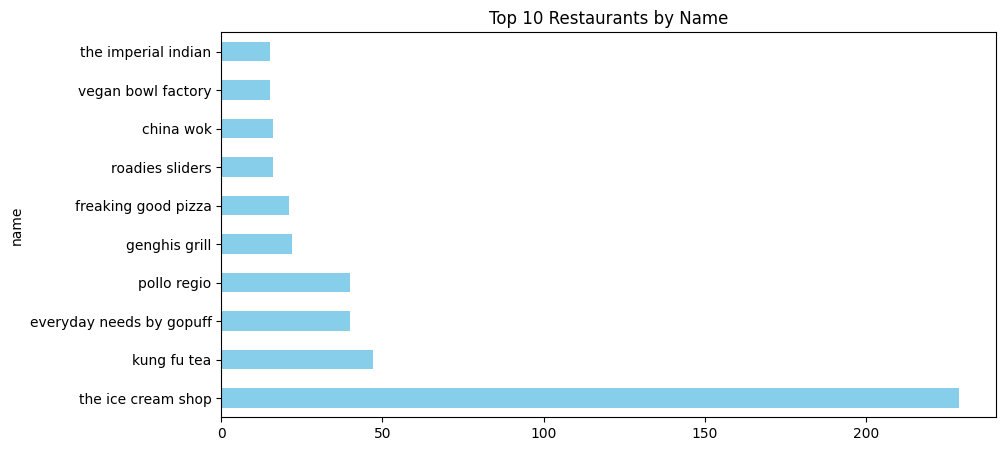

In [34]:
restaurants['name'].value_counts(ascending=False)[:10].plot(kind='barh', figsize=(10, 5), color='skyblue', title='Top 10 Restaurants by Name')

<Axes: title={'center': 'Top 10 Restaurants with Most Menu Items'}, ylabel='restaurant_id'>

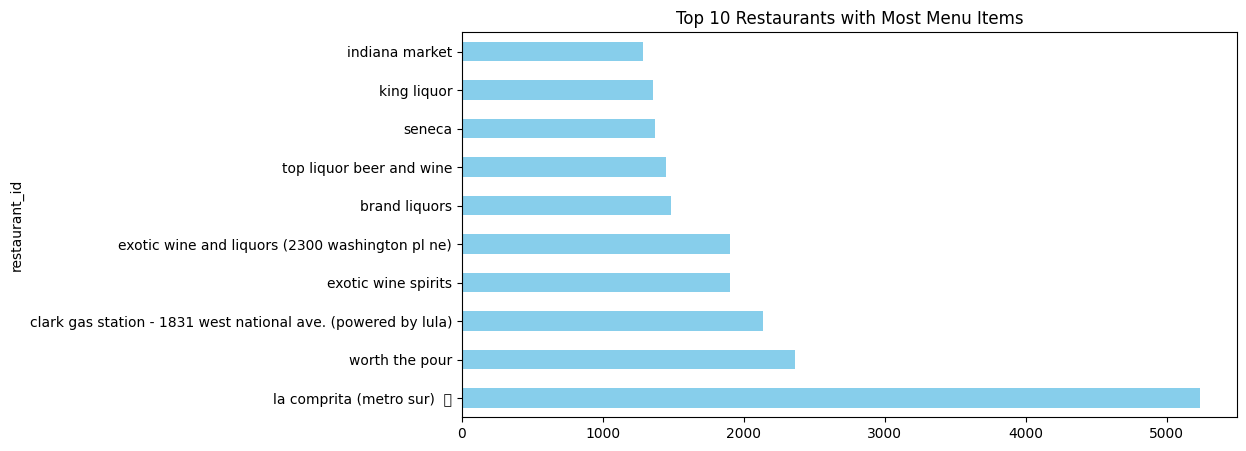

In [35]:
menu_counts = menus['restaurant_id'].value_counts().head(10)

id_to_name = restaurants.set_index('id')['name'].to_dict()
menu_counts.index = menu_counts.index.map(id_to_name)

menu_counts.plot(kind='barh', figsize=(10, 5), color='skyblue', title='Top 10 Restaurants with Most Menu Items')

In [36]:
restaurants.to_csv('restaurants_cleaned.csv', index=False)
menus.to_csv('restaurant-menus_cleaned.csv', index=False)